<a href="https://colab.research.google.com/github/EyaRIAHI-BE/Soft-Computing-Projects/blob/main/Brain_Tumor_DeepLearning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import cv2
import PIL
from PIL import Image
import glob
import numpy as np

DataYes = []

for i in glob.glob("/content/drive/MyDrive/brain_tumor_dataset/yes/*"):
    image = cv2.imread(i, cv2.IMREAD_COLOR)  # lecture de chaque image
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # convertir l'image BGR en niveaux de gris
    bigger = cv2.resize(gray_image, (200, 200))  # redimensionnement des images
    # print(i)
    DataYes.append(bigger)

np.array(DataYes).shape


(155, 200, 200)

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
DataNo = []

for i in glob.glob("/content/drive/MyDrive/brain_tumor_dataset/no/*"):
    image = cv2.imread(i, cv2.IMREAD_COLOR)  # lecture de chaque image
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # convertir l'image BGR en niveaux de gris
    bigger = cv2.resize(gray_image, (200, 200))  # redimensionnement des images
    # print(i)
    DataNo.append(bigger)

np.array(DataNo).shape


(98, 200, 200)

In [20]:
import numpy as np

DataYes = np.array(DataYes)
DataNo  = np.array(DataNo)

LabelYes = np.ones(len(DataYes))

LabelNo  = np.zeros(len(DataNo))


In [21]:
import numpy as np


Data = np.concatenate((DataYes, DataNo), axis=0)

Label = np.concatenate((LabelYes, LabelNo), axis=0)

print(Data.shape)
print(Label.shape)


(253, 200, 200)
(253,)


In [22]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    Data,
    Label,
    test_size=1/3,
    random_state=42,
    shuffle=True
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(168, 200, 200) (168,)
(85, 200, 200) (85,)


In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

classifier = Sequential()
classifier.add(Conv2D(32, kernel_size=9, input_shape=(200, 200, 1), activation='relu'))  # Couche convolution
classifier.add(MaxPooling2D(pool_size=8, strides=8))  # Couche pooling

classifier.add(Flatten())
classifier.add(Dense(units=240, activation='relu'))  # Le hidden layer
classifier.add(Dense(units=1, activation='sigmoid'))  # La couche de sortie
# Fin de l'architecture de modèle

# Compilation du modèle
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# L'apprentissage et le test du modèle
classifier.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 364ms/step - accuracy: 0.5674 - loss: 286.2363 - val_accuracy: 0.8000 - val_loss: 1.8535
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6721 - loss: 4.7770 - val_accuracy: 0.7882 - val_loss: 4.1441
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8061 - loss: 2.8724 - val_accuracy: 0.8235 - val_loss: 2.0283
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8018 - loss: 1.0715 - val_accuracy: 0.7647 - val_loss: 1.1192
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8104 - loss: 0.4846 - val_accuracy: 0.7412 - val_loss: 0.9020
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8579 - loss: 0.3042 - val_accuracy: 0.7765 - val_loss: 0.7211
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8746 - loss: 0.2778 - val_accuracy: 0.7647 - val_loss: 0.7841
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8600 - loss: 0.2760 - val_accuracy: 0.7765 - val_loss: 0.7451
Epoch 9/

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prédictions sur les données de test
y_pred_prob = classifier.predict(X_test)

# Conversion des probabilités en classes (0 ou 1)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Affichage des résultats
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step
Accuracy : 0.8235294117647058
Precision: 0.8363636363636363
Recall   : 0.8846153846153846
F1 Score : 0.8598130841121495


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 3.2366e-05 - val_accuracy: 0.8235 - val_loss: 1.7754
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 2.9632e-05 - val_accuracy: 0.8235 - val_loss: 1.7866
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 3.2442e-05 - val_accuracy: 0.8235 - val_loss: 1.7950
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 2.8428e-05 - val_accuracy: 0.8235 - val_loss: 1.8071
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 2.5646e-05 - val_accuracy: 0.8235 - val_loss: 1.8187
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 2.8445e-05 - val_accuracy: 0.8235 - val_loss: 1.8288
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 2.0728e-05 - val_accuracy: 0.8235 - val_loss: 1.8322
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 3.0442e-05 - val_accu

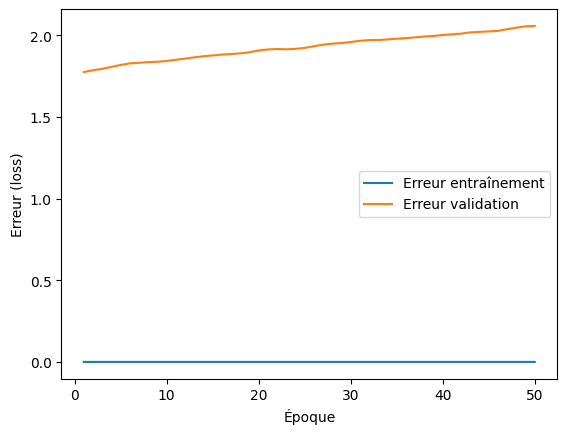

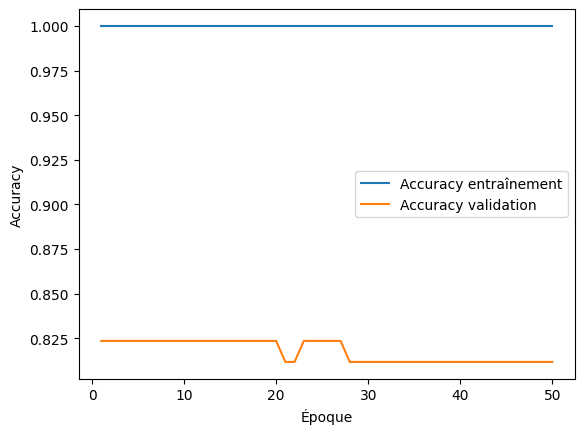

In [25]:

history = classifier.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32
)

# Extraire les métriques
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

import matplotlib.pyplot as plt
plt.plot(epochs, loss, label="Erreur entraînement")
plt.plot(epochs, val_loss, label="Erreur validation")
plt.xlabel("Époque")
plt.ylabel("Erreur (loss)")
plt.legend()
plt.show()

plt.plot(epochs, accuracy, label="Accuracy entraînement")
plt.plot(epochs, val_accuracy, label="Accuracy validation")
plt.xlabel("Époque")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



### Partie 2

In [26]:
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Conversion des données grayscale vers RGB
def grayscale_to_rgb(X):
    if len(X.shape) == 4 and X.shape[-1] == 1:
        return np.repeat(X, 3, axis=-1)
    elif len(X.shape) == 3:
        X = np.expand_dims(X, axis=-1)
        return np.repeat(X, 3, axis=-1)
    return X

X_train_rgb = grayscale_to_rgb(X_train)
X_test_rgb = grayscale_to_rgb(X_test)

# Normalisation pour ImageNet (optionnel mais recommandé)
X_train_rgb = X_train_rgb.astype('float32') / 255.0
X_test_rgb = X_test_rgb.astype('float32') / 255.0

# Modèle ResNet50 (inchangé)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(200, 200, 3))
base_model.trainable = False

inputs = Input(shape=(200, 200, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(240, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model_resnet50 = Model(inputs, outputs)

model_resnet50.compile(optimizer=Adam(learning_rate=0.0001),
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

# Entraînement avec données RGB
model_resnet50.fit(X_train_rgb, y_train, validation_data=(X_test_rgb, y_test),
                   epochs=50, batch_size=32)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.5937 - loss: 0.6881 - val_accuracy: 0.6118 - val_loss: 0.6687
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.6165 - loss: 0.6672 - val_accuracy: 0.6118 - val_loss: 0.6559
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.6363 - loss: 0.6421 - val_accuracy: 0.6118 - val_loss: 0.6474
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.6392 - loss: 0.6328 - val_accuracy: 0.6118 - val_loss: 0.6442
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.6184 - loss: 0.6440 - val_accuracy: 0.6118 - val_loss: 0.6390
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.5958 - loss: 0.6321 - val_accuracy: 0.6118 - val_loss: 0.6341
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.6140 - loss: 0.6326 - val_accuracy: 0.6118 - val_loss: 0.6269
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.6183 

In [27]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Conversion des données grayscale vers RGB (identique)
def grayscale_to_rgb(X):
    if len(X.shape) == 4 and X.shape[-1] == 1:
        return np.repeat(X, 3, axis=-1)
    elif len(X.shape) == 3:
        X = np.expand_dims(X, axis=-1)
        return np.repeat(X, 3, axis=-1)
    return X

# Conversion et normalisation des données
X_train_rgb = grayscale_to_rgb(X_train)
X_test_rgb = grayscale_to_rgb(X_test)
X_train_rgb = X_train_rgb.astype('float32') / 255.0
X_test_rgb = X_test_rgb.astype('float32') / 255.0

# Modèle VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))
base_model.trainable = False

inputs = Input(shape=(200, 200, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(240, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model_vgg16 = Model(inputs, outputs)

# Compilation et entraînement
model_vgg16.compile(optimizer=Adam(learning_rate=0.0001),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

model_vgg16.fit(X_train_rgb, y_train, validation_data=(X_test_rgb, y_test),
                epochs=50, batch_size=32)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.6099 - loss: 0.6879 - val_accuracy: 0.6118 - val_loss: 0.6717
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 273ms/step - accuracy: 0.5914 - loss: 0.6806 - val_accuracy: 0.6118 - val_loss: 0.6637
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 276ms/step - accuracy: 0.5991 - loss: 0.6652 - val_accuracy: 0.6118 - val_loss: 0.6566
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 286ms/step - accuracy: 0.6284 - loss: 0.6391 - val_accuracy: 0.6118 - val_loss: 0.6497
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 283ms/step - accuracy: 0.6317 - loss: 0.6348 - val_accuracy: 0.6118 - val_loss: 0.6443
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 283ms/step - accuracy: 0.6074 - loss: 0.6349 - val_accuracy: 0.6118 - val_loss: 0.6386
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 283ms/step - accuracy: 0.6421 - loss: 0.6112 - val_accuracy: 0.6118 - val_loss: 0.6334
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 287ms/step - accuracy: 0.6270 

In [28]:
import numpy as np
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Conversion des données grayscale vers RGB (identique)
def grayscale_to_rgb(X):
    if len(X.shape) == 4 and X.shape[-1] == 1:
        return np.repeat(X, 3, axis=-1)
    elif len(X.shape) == 3:
        X = np.expand_dims(X, axis=-1)
        return np.repeat(X, 3, axis=-1)
    return X

# Conversion et normalisation des données
X_train_rgb = grayscale_to_rgb(X_train)
X_test_rgb = grayscale_to_rgb(X_test)
X_train_rgb = X_train_rgb.astype('float32') / 255.0
X_test_rgb = X_test_rgb.astype('float32') / 255.0

# Modèle VGG19
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(200, 200, 3))
base_model.trainable = False   # On fige les poids du modèle pré-entraîné

inputs = Input(shape=(200, 200, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(240, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

model_vgg19 = Model(inputs, outputs)

# Compilation et entraînement
model_vgg19.compile(optimizer=Adam(learning_rate=0.0001),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

model_vgg19.fit(X_train_rgb, y_train,
                validation_data=(X_test_rgb, y_test),
                epochs=50,
                batch_size=32)


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 776ms/step - accuracy: 0.3813 - loss: 0.9179 - val_accuracy: 0.3882 - val_loss: 0.7895
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 335ms/step - accuracy: 0.3938 - loss: 0.7673 - val_accuracy: 0.4588 - val_loss: 0.6990
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 334ms/step - accuracy: 0.4808 - loss: 0.6959 - val_accuracy: 0.6118 - val_loss: 0.6619
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 342ms/step - accuracy: 0.6177 - loss: 0.6594 - val_accuracy: 0.6118 - val_loss: 0.6537
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 350ms/step - accuracy: 0.6485 - loss: 0.6362 - val_accuracy: 0.6118 - val_loss: 0.6515
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 355ms/step - accuracy: 0.6062 - loss: 0.6600 - val_accuracy: 0.6118 - val_loss: 0.6473
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 353ms/step - accuracy: 0.6012 - loss: 0.6478 - val_accuracy: 0.6118 - val_loss: 0.6411
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 357ms/step - accuracy: 0.639

In [29]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Conversion des données grayscale vers RGB (identique)
def grayscale_to_rgb(X):
    if len(X.shape) == 4 and X.shape[-1] == 1:
        return np.repeat(X, 3, axis=-1)
    elif len(X.shape) == 3:
        X = np.expand_dims(X, axis=-1)
        return np.repeat(X, 3, axis=-1)
    return X

# Conversion et normalisation des données
X_train_rgb = grayscale_to_rgb(X_train)
X_test_rgb = grayscale_to_rgb(X_test)
X_train_rgb = X_train_rgb.astype('float32') / 255.0
X_test_rgb = X_test_rgb.astype('float32') / 255.0

# Modèle InceptionV3
base_model = InceptionV3(weights='imagenet',
                         include_top=False,
                         input_shape=(200, 200, 3))
base_model.trainable = False  # On freeze les poids

inputs = Input(shape=(200, 200, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(240, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

model_inception = Model(inputs, outputs)

# Compilation et entraînement
model_inception.compile(optimizer=Adam(learning_rate=0.0001),
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

model_inception.fit(X_train_rgb, y_train,
                    validation_data=(X_test_rgb, y_test),
                    epochs=50,
                    batch_size=32)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.5670 - loss: 0.6792 - val_accuracy: 0.7765 - val_loss: 0.5078
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.8395 - loss: 0.4395 - val_accuracy: 0.7765 - val_loss: 0.4581
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.8668 - loss: 0.3454 - val_accuracy: 0.8471 - val_loss: 0.4196
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.9148 - loss: 0.2608 - val_accuracy: 0.8353 - val_loss: 0.3935
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9082 - loss: 0.2426 - val_accuracy: 0.8471 - val_loss: 0.4053
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.9491 - loss: 0.1797 - val_accuracy: 0.8588 - val_loss: 0.3904
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.9796 - loss: 0.1647 - val_accuracy: 0.8471 - val_loss: 0.3789
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.9870 - loss

### Partie 3

In [30]:
import numpy as np
import os
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm

# Charger le modèle VGG16 sans la couche fully-connected
model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Chemin vers le dataset
dataset_path = "/content/drive/MyDrive/brain_tumor_dataset/"

# Listes
Data_extract = []
labels = []

# Extraction
for label in os.listdir(dataset_path):
    folder = os.path.join(dataset_path, label)
    for img_name in tqdm(os.listdir(folder), desc=f"Processing {label}"):
        img_path = os.path.join(folder, img_name)

        # Préparation image
        img = load_img(img_path, target_size=(224, 224))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        # Extraction features
        features = model.predict(img_array)
        features = features.flatten()

        Data_extract.append(features)
        labels.append(label)

Data_extract = np.array(Data_extract)
labels = np.array(labels)

print("Data_extract shape:", Data_extract.shape)


Processing yes:   0%|          | 0/155 [00:00<?, ?it/s]WARNING:tensorflow:5 out of the last 7 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7cbcfc5a0cc0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Processing yes:   1%|          | 1/155 [00:02<05:09,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing yes:   1%|▏         | 2/155 [00:02<02:20,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing yes:   2%|▏         | 3/155 [00:02<01:29,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing yes:   3%|▎         | 5/155 [00:02<00:45,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing yes:   5%|▍         | 7/155 [00:02<00:29,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing yes:   6%|▌         | 9/155 [00:02<00:22,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing yes:   7%|▋         | 11/155 [00:02<00:18,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing yes:   8%|▊         | 13/155 [00:03<00:15,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing yes:  10%|▉         | 15/155 [00:03<00:13, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing yes:  11%|█         | 17/155 [00:03<00:12, 11.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing yes:  12%|█▏        | 19/155 [00:03<00:11, 11.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing yes:  14%|█▎        | 21/155 [00:03<00:11, 11.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing yes:  15%|█▍        | 23/155 [00:03<00:11, 11.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing yes:  16%|█▌        | 25/155 [00:04<00:11, 11.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing yes:  17%|█▋        | 27/155 [00:04<00:11, 11.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing yes:  19%|█▊        | 29/155 [00:04<00:10, 11.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing yes:  20%|██        | 31/155 [00:04<00:10, 11.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing yes:  21%|██▏       | 33/155 [00:04<00:10, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing yes:  23%|██▎       | 35/155 [00:04<00:10, 11.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing yes:  24%|██▍       | 37/155 [00:05<00:09, 11.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing yes:  25%|██▌       | 39/155 [00:05<00:09, 11.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing yes:  26%|██▋       | 41/155 [00:05<00:09, 11.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing yes:  28%|██▊       | 43/155 [00:05<00:09, 11.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing yes:  29%|██▉       | 45/155 [00:05<00:09, 11.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing yes:  30%|███       | 47/155 [00:05<00:09, 11.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing yes:  32%|███▏      | 49/155 [00:06<00:09, 11.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing yes:  33%|███▎      | 51/155 [00:06<00:09, 11.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing yes:  34%|███▍      | 53/155 [00:06<00:08, 11.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing yes:  35%|███▌      | 55/155 [00:06<00:08, 11.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing yes:  37%|███▋      | 57/155 [00:06<00:08, 11.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing yes:  38%|███▊      | 59/155 [00:07<00:08, 11.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing yes:  39%|███▉      | 61/155 [00:07<00:08, 11.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing yes:  41%|████      | 63/155 [00:07<00:08, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing yes:  42%|████▏     | 65/155 [00:07<00:07, 11.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing yes:  43%|████▎     | 67/155 [00:07<00:07, 11.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing yes:  45%|████▍     | 69/155 [00:07<00:07, 11.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing yes:  46%|████▌     | 71/155 [00:08<00:07, 11.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing yes:  47%|████▋     | 73/155 [00:08<00:07, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing yes:  48%|████▊     | 75/155 [00:08<00:07, 11.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing yes:  50%|████▉     | 77/155 [00:08<00:06, 11.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing yes:  51%|█████     | 79/155 [00:08<00:06, 11.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing yes:  52%|█████▏    | 81/155 [00:08<00:06, 11.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing yes:  54%|█████▎    | 83/155 [00:09<00:06, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing yes:  55%|█████▍    | 85/155 [00:09<00:06, 11.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing yes:  56%|█████▌    | 87/155 [00:09<00:05, 11.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing yes:  57%|█████▋    | 89/155 [00:09<00:05, 11.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing yes:  59%|█████▊    | 91/155 [00:09<00:05, 11.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing yes:  60%|██████    | 93/155 [00:10<00:05, 11.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing yes:  61%|██████▏   | 95/155 [00:10<00:05, 11.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing yes:  63%|██████▎   | 97/155 [00:10<00:05, 11.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing yes:  64%|██████▍   | 99/155 [00:10<00:04, 11.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing yes:  65%|██████▌   | 101/155 [00:10<00:04, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing yes:  66%|██████▋   | 103/155 [00:10<00:05,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing yes:  68%|██████▊   | 105/155 [00:11<00:05,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing yes:  68%|██████▊   | 106/155 [00:11<00:05,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing yes:  69%|██████▉   | 107/155 [00:11<00:05,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing yes:  70%|██████▉   | 108/155 [00:11<00:05,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing yes:  70%|███████   | 109/155 [00:11<00:05,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing yes:  71%|███████   | 110/155 [00:11<00:05,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing yes:  72%|███████▏  | 111/155 [00:11<00:05,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing yes:  72%|███████▏  | 112/155 [00:12<00:04,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing yes:  73%|███████▎  | 113/155 [00:12<00:04,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing yes:  74%|███████▎  | 114/155 [00:12<00:04,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing yes:  74%|███████▍  | 115/155 [00:12<00:04,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing yes:  75%|███████▍  | 116/155 [00:12<00:04,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing yes:  75%|███████▌  | 117/155 [00:12<00:04,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing yes:  76%|███████▌  | 118/155 [00:12<00:04,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing yes:  77%|███████▋  | 119/155 [00:12<00:04,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing yes:  77%|███████▋  | 120/155 [00:13<00:03,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing yes:  78%|███████▊  | 121/155 [00:13<00:03,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing yes:  79%|███████▊  | 122/155 [00:13<00:03,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing yes:  79%|███████▉  | 123/155 [00:13<00:03,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing yes:  80%|████████  | 124/155 [00:13<00:03,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing yes:  81%|████████  | 125/155 [00:13<00:03,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing yes:  81%|████████▏ | 126/155 [00:13<00:03,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing yes:  82%|████████▏ | 127/155 [00:13<00:03,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing yes:  83%|████████▎ | 128/155 [00:13<00:03,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing yes:  83%|████████▎ | 129/155 [00:14<00:03,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing yes:  85%|████████▍ | 131/155 [00:14<00:02,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing yes:  86%|████████▌ | 133/155 [00:14<00:02,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing yes:  87%|████████▋ | 135/155 [00:14<00:01, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing yes:  88%|████████▊ | 137/155 [00:14<00:01, 10.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing yes:  90%|████████▉ | 139/155 [00:15<00:01, 10.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing yes:  91%|█████████ | 141/155 [00:15<00:01, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing yes:  92%|█████████▏| 143/155 [00:15<00:01, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing yes:  94%|█████████▎| 145/155 [00:15<00:00, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing yes:  95%|█████████▍| 147/155 [00:15<00:00, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing yes:  96%|█████████▌| 149/155 [00:15<00:00, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing yes:  97%|█████████▋| 151/155 [00:16<00:00, 10.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing yes:  99%|█████████▊| 153/155 [00:16<00:00, 10.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing no:   0%|          | 0/98 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing no:   1%|          | 1/98 [00:00<00:11,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing no:   3%|▎         | 3/98 [00:00<00:08, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing no:   5%|▌         | 5/98 [00:00<00:08, 11.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing no:   7%|▋         | 7/98 [00:00<00:08, 11.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing no:   9%|▉         | 9/98 [00:00<00:07, 11.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing no:  11%|█         | 11/98 [00:00<00:07, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing no:  13%|█▎        | 13/98 [00:01<00:07, 11.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing no:  15%|█▌        | 15/98 [00:01<00:07, 11.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing no:  17%|█▋        | 17/98 [00:01<00:07, 10.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing no:  19%|█▉        | 19/98 [00:01<00:07, 10.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing no:  21%|██▏       | 21/98 [00:01<00:07, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing no:  23%|██▎       | 23/98 [00:02<00:06, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing no:  26%|██▌       | 25/98 [00:02<00:07, 10.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing no:  28%|██▊       | 27/98 [00:02<00:06, 10.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing no:  30%|██▉       | 29/98 [00:02<00:06, 10.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing no:  32%|███▏      | 31/98 [00:02<00:06, 11.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing no:  34%|███▎      | 33/98 [00:03<00:05, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing no:  36%|███▌      | 35/98 [00:03<00:05, 11.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing no:  38%|███▊      | 37/98 [00:03<00:05, 11.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing no:  40%|███▉      | 39/98 [00:03<00:05, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing no:  42%|████▏     | 41/98 [00:03<00:05, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing no:  44%|████▍     | 43/98 [00:03<00:05, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing no:  46%|████▌     | 45/98 [00:04<00:04, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing no:  48%|████▊     | 47/98 [00:04<00:04, 10.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing no:  50%|█████     | 49/98 [00:04<00:04, 10.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing no:  52%|█████▏    | 51/98 [00:04<00:04, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing no:  54%|█████▍    | 53/98 [00:04<00:04, 11.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing no:  56%|█████▌    | 55/98 [00:05<00:03, 11.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing no:  58%|█████▊    | 57/98 [00:05<00:03, 10.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing no:  60%|██████    | 59/98 [00:05<00:03, 11.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing no:  62%|██████▏   | 61/98 [00:05<00:03, 11.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing no:  64%|██████▍   | 63/98 [00:05<00:03, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing no:  66%|██████▋   | 65/98 [00:05<00:02, 11.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing no:  68%|██████▊   | 67/98 [00:06<00:02, 11.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing no:  70%|███████   | 69/98 [00:06<00:02, 11.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing no:  72%|███████▏  | 71/98 [00:06<00:02, 11.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing no:  74%|███████▍  | 73/98 [00:06<00:02, 10.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing no:  77%|███████▋  | 75/98 [00:06<00:02, 11.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing no:  79%|███████▊  | 77/98 [00:07<00:01, 11.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing no:  81%|████████  | 79/98 [00:07<00:01, 10.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing no:  83%|████████▎ | 81/98 [00:07<00:01, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing no:  85%|████████▍ | 83/98 [00:07<00:01, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing no:  87%|████████▋ | 85/98 [00:07<00:01,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing no:  88%|████████▊ | 86/98 [00:07<00:01,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing no:  89%|████████▉ | 87/98 [00:08<00:01,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing no:  90%|████████▉ | 88/98 [00:08<00:01,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing no:  91%|█████████ | 89/98 [00:08<00:01,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing no:  92%|█████████▏| 90/98 [00:08<00:00,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing no:  93%|█████████▎| 91/98 [00:08<00:00,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing no:  94%|█████████▍| 92/98 [00:08<00:00,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing no:  95%|█████████▍| 93/98 [00:08<00:00,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing no:  96%|█████████▌| 94/98 [00:08<00:00,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing no:  97%|█████████▋| 95/98 [00:09<00:00,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing no:  98%|█████████▊| 96/98 [00:09<00:00,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing no:  99%|█████████▉| 97/98 [00:09<00:00,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing no: 100%|██████████| 98/98 [00:09<00:00, 10.28it/s]

Data_extract shape: (253, 25088)


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    Data_extract, labels, test_size=0.2, random_state=42, shuffle=True
)

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import joblib

svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print(" Accuracy SVM :", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Save the SVM model
joblib.dump(svm_model, "svm_brain_tumor.pkl")

 Accuracy SVM : 0.8431372549019608
              precision    recall  f1-score   support

          no       0.94      0.71      0.81        24
         yes       0.79      0.96      0.87        27

    accuracy                           0.84        51
   macro avg       0.87      0.84      0.84        51
weighted avg       0.86      0.84      0.84        51



['svm_brain_tumor.pkl']

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("Accuracy KNN =", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Save the KNN model
joblib.dump(knn, "knn_brain_tumor.pkl")

Accuracy KNN = 0.7843137254901961
              precision    recall  f1-score   support

          no       0.71      0.92      0.80        24
         yes       0.90      0.67      0.77        27

    accuracy                           0.78        51
   macro avg       0.80      0.79      0.78        51
weighted avg       0.81      0.78      0.78        51



['knn_brain_tumor.pkl']

In [34]:
!pip install streamlit
!pip install pyngrok
!pip install tensorflow scikit-learn pillow matplotlib joblib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 90.7 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 7.0.1
    Uninstalling cachetools-7.0.1:
      Successfully uninstalled cachetools-7.0.1


In [35]:
!pip install streamlit

In [ ]:
# -----------------------------
# 0️⃣ Installer les packages nécessaires
# -----------------------------
!pip install gradio -q
!pip install tensorflow scikit-learn pillow joblib -q

import os
import numpy as np
from PIL import Image, ImageDraw
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib
import gradio as gr

# -----------------------------
# 1️⃣ Charger et préparer les images
# -----------------------------
dataset_path = "/content/drive/MyDrive/brain_tumor_dataset"  # à modifier selon ton chemin
X = []
y = []

for label in ["yes","no"]:
    folder = os.path.join(dataset_path, label)
    for img_file in os.listdir(folder):
        img_path = os.path.join(folder, img_file)
        img = load_img(img_path, target_size=(200,200))
        img_array = img_to_array(img)
        # Convertir grayscale → RGB
        if img_array.ndim == 2 or img_array.shape[-1]==1:
            img_array = np.repeat(np.expand_dims(img_array, axis=-1),3,axis=-1)
        img_array = img_array.astype('float32') / 255.0
        X.append(img_array)
        y.append(label)

X = np.array(X)
y = np.array(y)

# -----------------------------
# 2️⃣ Extraire les features avec VGG16 + GAP (512 features)
# -----------------------------
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(200,200,3))
base_model.trainable = False

inputs = Input(shape=(200,200,3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
feature_extractor = Model(inputs, x)

print("🚀 Extraction des features...")
features = feature_extractor.predict(X, verbose=1)

# -----------------------------
# 3️⃣ Normaliser et split
# -----------------------------
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, y, test_size=0.2, random_state=42, shuffle=True)

# -----------------------------
# 4️⃣ Entraîner SVM
# -----------------------------
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Évaluer accuracy
acc = svm_model.score(X_test, y_test)
print(f"✅ Accuracy sur test set: {acc*100:.2f}%")

# -----------------------------
# 5️⃣ Sauvegarder modèle SVM
# -----------------------------
joblib.dump(svm_model, "svm_brain_tumor.pkl")
print("💾 Modèle SVM sauvegardé !")

# -----------------------------
# 6️⃣ Prétraitement image pour interface
# -----------------------------
def preprocess_image(img: Image.Image):
    img = img.resize((200,200))
    img_array = np.array(img)
    if img_array.ndim == 2 or img_array.shape[-1]==1:
        img_array = np.repeat(np.expand_dims(img_array, axis=-1),3,axis=-1)
    img_array = img_array.astype('float32')/255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def add_confidence_bar(img: Image.Image, label: str, confidence: float):
    """Ajoute une barre de confiance colorée sur l'image"""
    img = img.resize((300,300))
    draw = ImageDraw.Draw(img)
    bar_width = int(confidence * 3)  # max 300 px
    color = (255,0,0) if "TUMEUR" in label else (0,200,0)
    draw.rectangle([0, 280, bar_width, 300], fill=color)
    draw.text((10, 10), label, fill="white")
    return img

# -----------------------------
# 7️⃣ Fonction de prédiction
# -----------------------------
def predict_brain_tumor(images):
    outputs = []
    for img in images:
        img_array = preprocess_image(img)
        features = feature_extractor.predict(img_array)
        features_scaled = scaler.transform(features)

        pred_class = svm_model.predict(features_scaled)[0]
        conf = svm_model.predict_proba(features_scaled)[0][1]*100

        if pred_class=="yes":
            label = f"🔴 TUMEUR DÉTECTÉE\nProbabilité: {conf:.1f}%"
        else:
            label = f"🟢 PAS DE TUMEUR\nProbabilité: {100-conf:.1f}%"

        img_with_bar = add_confidence_bar(img, label, conf)
        outputs.append(img_with_bar)
    return outputs

# -----------------------------
# 8️⃣ Interface Gradio interactive
# -----------------------------
with gr.Blocks(title="Brain Tumor Detection - VGG16 + SVM") as demo:
    gr.Markdown("## 🧠 Détecteur de Tumeur Cérébrale (VGG16 + SVM)")
    gr.Markdown("Téléversez vos images cérébrales pour détecter les tumeurs automatiquement.")

    with gr.Row():
        with gr.Column(scale=1):
            img_input = gr.Image(label="Téléverser image(s)", type="pil", tool="editor", image_mode="RGB", source="upload", interactive=True, shape=(300,300))
            predict_btn = gr.Button("🔬 ANALYSER", variant="primary")
        with gr.Column(scale=2):
            gallery = gr.Gallery(label="Résultats", columns=2, show_label=True).style(height="auto")

    predict_btn.click(fn=predict_brain_tumor, inputs=[img_input], outputs=gallery)

# -----------------------------
# 9️⃣ Lancer l'interface
# -----------------------------
demo.launch(share=True, debug=True)